<a href="https://colab.research.google.com/github/Imshubhham/Imshubham/blob/main/Spam_Classifier_Using_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [76]:
df = pd.read_csv('/content/SMSSpamCollection', sep = '\t', names = ['label', 'message'])

In [77]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [78]:
import re
import nltk

In [79]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [80]:
corpus = []
for i in range(0, len(df)):
  review = re.sub('[a-zA-Z]', ' ', df['message'][i])
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  corpus.append(review)

In [81]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 2500)
X = cv.fit_transform(corpus).toarray()
y = pd.get_dummies(df['label'])

In [82]:
y = y.iloc[:,0]

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score as ac, confusion_matrix as cm
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(ac(y_test, y_pred)*100)
print(cm(y_test, y_pred)*100)

93.8397129186603
[[ 13700  10100]
 [   200 143200]]


In [85]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(ac(y_test, y_pred)*100)
print(cm(y_test, y_pred)*100)

95.03588516746412
[[ 15800   8000]
 [   300 143100]]


In [86]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(ac(y_test, y_pred)*100)
print(cm(y_test, y_pred)*100)

94.97607655502392
[[ 15800   8000]
 [   400 143000]]


In [87]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(ac(y_test, y_pred)*100)
print(cm(y_test, y_pred)*100)

91.20813397129187
[[  9300  14500]
 [   200 143200]]


In [88]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)

mlp.fit(X_train_scaled, y_train)

y_pred = mlp.predict(X_test_scaled)

accuracy = ac(y_test, y_pred)*100
CM = cm(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Confusion_matrics: {CM}")

Accuracy: 96.8609865470852
Confusion_matrics: [[119  30]
 [  5 961]]


In [89]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [90]:
model = Sequential()

model.add(Dense(units=64, activation='relu', input_dim=X.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                42368     
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 1)                 33        
                                                                 
Total params: 44,481
Trainable params: 44,481
Non-trainable params: 0
_________________________________________________________________


In [91]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
112/112 [==============================] - 1s 3ms/step - loss: 0.6038 - accuracy: 0.9554 - val_loss: 0.4700 - val_accuracy: 0.9596
Epoch 2/10
112/112 [==============================] - 0s 3ms/step - loss: 0.2771 - accuracy: 0.9717 - val_loss: 0.1734 - val_accuracy: 0.9552
Epoch 3/10
112/112 [==============================] - 0s 2ms/step - loss: 0.1113 - accuracy: 0.9728 - val_loss: 0.1456 - val_accuracy: 0.9563
Epoch 4/10
112/112 [==============================] - 0s 2ms/step - loss: 0.0860 - accuracy: 0.9790 - val_loss: 0.1456 - val_accuracy: 0.9563
Epoch 5/10
112/112 [==============================] - 0s 3ms/step - loss: 0.0776 - accuracy: 0.9835 - val_loss: 0.1463 - val_accuracy: 0.9574
Epoch 6/10
112/112 [==============================] - 0s 2ms/step - loss: 0.0746 - accuracy: 0.9849 - val_loss: 0.1457 - val_accuracy: 0.9585
Epoch 7/10
112/112 [==============================] - 0s 3ms/step - loss: 0.0730 - accuracy: 0.9849 - val_loss: 0.1523 - val_accuracy: 0.9563
Epoch 

In [92]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

35/35 [==============================] - 0s 1ms/step - loss: 0.1021 - accuracy: 0.9722
Test Loss: 0.1021, Test Accuracy: 0.9722


In [93]:
CM = cm(y_test, y_pred)
print(f"Confusion_matrics: {CM}")

Confusion_matrics: [[119  30]
 [  5 961]]


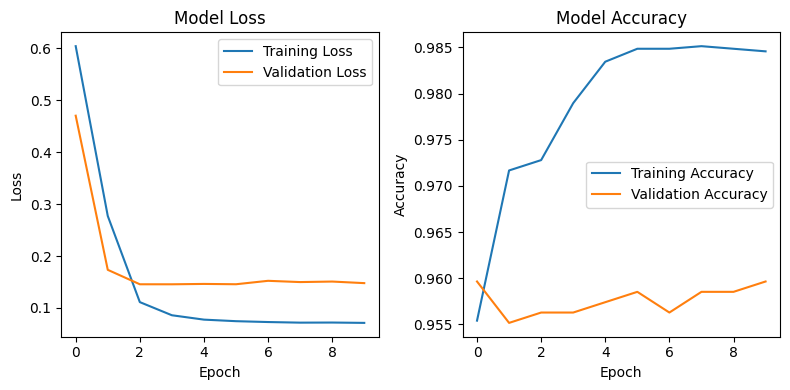

In [94]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
